In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data(
)

In [3]:
# Rescale -1 to 1
x_train = x_train / 127.5 - 1.
x_train = np.expand_dims(x_train, axis=3)

In [4]:
# Define the generator model
def define_generator():
    model = keras.Sequential()
    model.add(layers.Dense(7*7*256, input_dim=100, activation='relu'))
    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', activation='tanh'))
    return model

In [19]:
# # Define the discriminator model
# def define_discriminator():
#     model = keras.Sequential()
#     model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(1, activation='sigmoid'))
#     return model

# Define the discriminator model
def define_discriminator():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')  # Add this line
    return model

# Create discriminator model
discriminator = define_discriminator()

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Define the GAN model
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [21]:
# Create generator and discriminator models
generator = define_generator()
discriminator = define_discriminator()

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Create GAN model
gan = define_gan(generator, discriminator)

In [23]:
# Train the GAN
batch_size = 32
for epoch in range(100):
    for i in range(len(x_train) // batch_size):
        # Sample a batch of real data
        real_data = x_train[np.random.choice(x_train.shape[0], batch_size, replace=False)]


In [24]:
# Sample a batch of noise
noise = np.random.normal(0, 1, (batch_size, 100))


In [25]:
# Train the discriminator
discriminator.trainable = True
d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
d_loss_fake = discriminator.train_on_batch(generator.predict(noise), np.zeros((batch_size, 1)))
d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [26]:
# Train the generator
discriminator.trainable = False
g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

print(f'Epoch {epoch+1}, D loss: {d_loss}, G loss: {g_loss}')

Epoch 100, D loss: 0.7165919542312622, G loss: [array(0.71346027, dtype=float32), array(0.71346027, dtype=float32)]


In [27]:
# Generate some images
noise = np.random.normal(0, 1, (10, 100))
generated_images = generator.predict(noise)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


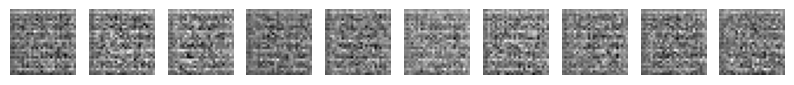

In [28]:
# Plot the generated images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
plt.show()